## K-means clustering

In this notebook, we'll cluster sequences to find similar sequences with similar patterns.

In [1]:
### Loading in libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
### Read in data. We'll store our data in a dataframe called 'df'

df = pd.read_csv('Alignment-HitTable.csv', header = None)
df.columns = ['query acc.verr', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 
             'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score']
df.head()

,query acc.verr,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,MN997409.1,MN997409.1,100.00,29882,0,0,1,29882,1,29882,0.0,55182
1,MN997409.1,MT020881.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
2,MN997409.1,MT020880.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
3,MN997409.1,MN985325.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166
4,MN997409.1,MN975262.1,99.99,29882,3,0,1,29882,1,29882,0.0,55166


In [3]:
df_numeric = df[['% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end',
        's. start', 's. end', 'evalue', 'bit score']]

In [4]:
df_numeric

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,100.000,29882,0,0,1,29882,1,29882,0.0,55182
1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
2,99.990,29882,3,0,1,29882,1,29882,0.0,55166
3,99.990,29882,3,0,1,29882,1,29882,0.0,55166
4,99.990,29882,3,0,1,29882,1,29882,0.0,55166
...,...,...,...,...,...,...,...,...,...,...
258,79.325,1925,357,35,19,1923,3,1906,0.0,1312
259,82.304,17716,2948,169,3956,21577,3868,21490,0.0,15175
260,80.063,5417,988,68,22539,27910,22414,27783,0.0,3936
261,90.189,1641,142,12,28257,29882,28088,29724,0.0,2121


In [5]:
## Part A (25 pts)

## Fit a K-means clustering with 5 clusters and a random state of 10 on the numeric columns in the dataframe.
## Store the predicted groups in a variable called 'y_pred'. 

# your code here
kmeans = KMeans(n_clusters=5, random_state=10).fit(df_numeric)
y_pred = kmeans.predict(df_numeric)
cluster_labels = kmeans.fit_predict(df_numeric)

In [6]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 0, 2, 0, 2, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2,
       4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3,
       0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2,
       3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0,
       2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4,
       3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0,
       2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4,
       3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0,
       2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4,
       3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3])

In [7]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 0, 2, 0, 2, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2,
       4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3,
       0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2,
       3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0,
       2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4,
       3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0,
       2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4,
       3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0,
       2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4,
       3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3, 0, 2, 4, 3])

In [8]:
### Part B (15 pts)

## Store the silhouette score on the predicted groups in a variable called 'score'.
## Hint: Use https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

# your code here
from sklearn.metrics import silhouette_score
score = silhouette_score(df_numeric,labels=cluster_labels,random_state=10)
score

0.9631789756168802

In [9]:
## Part C (30 pts)

## Store the silhouette scores for clusters 2 to 9 in a list called 'silhouette_scores'.
## Use a random state of 0 for each prediction.

# your code here
silhouette_scores = []

for i in range(2,10):
    clusterer = KMeans(n_clusters=i, random_state=0)
    cluster_labels = clusterer.fit_predict(df_numeric)
    x = silhouette_score(df_numeric, cluster_labels, random_state=0)
    silhouette_scores.append(x)

In [10]:
silhouette_scores

[0.6051834228711443,
 0.7738364263509722,
 0.9305719394105517,
 0.9630140391667396,
 0.9629814353013388,
 0.9621072293745968,
 0.9651194568092576,
 0.9633038874197052]

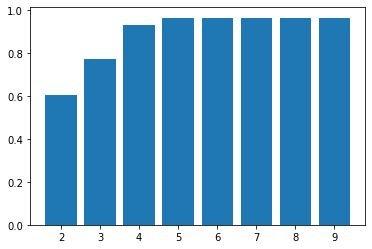

In [11]:
plt.bar(range(2, len(silhouette_scores) +2), silhouette_scores)
plt.show()

In [12]:
## Part D (30 pts)

## Use a K-means clustering with 5 clusters on the normalized numeric dataframe. Use a random state of 0.
## Hint: Use the https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html to scale the data.
## Store the cluster centers in a dataframe called 'cluster_centers'. 
## Use the index ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'] on the dataframe.

# your code here
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# df_numeric_scaled = scaler.fit_transform(df_numeric)

# kmeans = KMeans(n_clusters=5, random_state=0).fit(df_numeric_scaled)
# y_pred = kmeans.predict(df_numeric_scaled)
# cluster_labels = kmeans.fit_predict(df_numeric_scaled)
# cluster_centers = pd.DataFrame(kmeans.cluster_centers_, index=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'] )
# cluster_centers

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [14]:
df_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled

array([[ 1.83472331,  1.82390253, -0.84822365, ...,  0.75410796,
         0.        ,  2.13347386],
       [ 1.83340668,  1.82390253, -0.8454554 , ...,  0.75410796,
         0.        ,  2.1326401 ],
       [ 1.83340668,  1.82390253, -0.8454554 , ...,  0.75410796,
         0.        ,  2.1326401 ],
       ...,
       [-0.79023319, -0.50367772,  0.06345214, ...,  0.55607965,
         0.        , -0.53696079],
       [ 0.54298191, -0.86292329, -0.71719332, ...,  0.73920159,
         0.        , -0.63154064],
       [-0.89003341, -0.83561834, -0.51787959, ..., -1.88516873,
         0.        , -0.67369772]])

In [15]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_numeric_scaled)
y_pred = kmeans.predict(df_numeric_scaled)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 3, 1, 3, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4,
       1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0,
       3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4,
       0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3,
       4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1,
       0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3,
       4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1,
       0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3,
       4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1,
       0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0, 3, 4, 1, 0])

In [16]:
kmeans.cluster_centers_

array([[-0.87034986, -0.83282055, -0.5164442 , -0.39960225, -0.93962594,
        -1.88231555, -0.93860595, -1.88195754,  0.        , -0.67082587],
       [ 0.56796253, -0.83626053, -0.70012247, -0.75069005,  1.38350189,
         0.73662756,  1.38332567,  0.7318916 ,  0.        , -0.60999776],
       [ 1.83147563,  1.80569078, -0.84291272, -0.95326718, -0.94092325,
         0.72653413, -0.93891891,  0.7359226 ,  0.        ,  2.11303512],
       [-0.463023  ,  0.67430804,  1.84486058,  1.76529158, -0.61861753,
        -0.03682817, -0.62200027, -0.03740488,  0.        ,  0.06676893],
       [-0.78787072, -0.50075712,  0.06714313,  0.1777953 ,  0.9364001 ,
         0.56085679,  0.93735566,  0.55812318,  0.        , -0.53536603]])

In [17]:
print(kmeans.cluster_centers_)

[[-0.87034986 -0.83282055 -0.5164442  -0.39960225 -0.93962594 -1.88231555
  -0.93860595 -1.88195754  0.         -0.67082587]
 [ 0.56796253 -0.83626053 -0.70012247 -0.75069005  1.38350189  0.73662756
   1.38332567  0.7318916   0.         -0.60999776]
 [ 1.83147563  1.80569078 -0.84291272 -0.95326718 -0.94092325  0.72653413
  -0.93891891  0.7359226   0.          2.11303512]
 [-0.463023    0.67430804  1.84486058  1.76529158 -0.61861753 -0.03682817
  -0.62200027 -0.03740488  0.          0.06676893]
 [-0.78787072 -0.50075712  0.06714313  0.1777953   0.9364001   0.56085679
   0.93735566  0.55812318  0.         -0.53536603]]


In [18]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, 
                               index=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                               columns=df_numeric.columns)
cluster_centers

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
Cluster 1,-0.870350,-0.832821,-0.516444,-0.399602,-0.939626,-1.882316,-0.938606,-1.881958,0.0,-0.670826
Cluster 2,0.567963,-0.836261,-0.700122,-0.750690,1.383502,0.736628,1.383326,0.731892,0.0,-0.609998
Cluster 3,1.831476,1.805691,-0.842913,-0.953267,-0.940923,0.726534,-0.938919,0.735923,0.0,2.113035
Cluster 4,-0.463023,0.674308,1.844861,1.765292,-0.618618,-0.036828,-0.622000,-0.037405,0.0,0.066769
Cluster 5,-0.787871,-0.500757,0.067143,0.177795,0.936400,0.560857,0.937356,0.558123,0.0,-0.535366
